In [28]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
herat_mid = pd.read_excel('Herat Mid-term Data Set.xlsx')
herat_end = pd.read_excel('EWLI_HRT_Endline_Treat_Group - latest version - labels - 2019-04-07-11-30-56.xlsx')

In [3]:
herat_mid.dropna(thresh=30, axis=0, inplace=True)

##### Literacy

In [4]:
herat_mid['lit_fem_ratio'] = herat_mid['hh_lit_female']/herat_mid['hh_female']
herat_end['lit_fem_ratio'] = herat_end['hh_lit_female']/herat_end['hh_female']
herat_mid['lit_mal_ratio'] = herat_mid['hh_lit_male']/herat_mid['hh_male']
herat_end['lit_mal_ratio'] = herat_end['hh_lit_male']/herat_end['hh_male']

In [10]:
# compare females ratios

stat, p = ttest_ind(herat_end['lit_fem_ratio'], herat_mid['lit_fem_ratio'], nan_policy='omit')
print('t=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-1.672, p=0.095
Accept null hypothesis that the means are equal.


In [9]:
# compare males ratios

stat, p = ttest_ind(herat_end['lit_mal_ratio'], herat_mid['lit_mal_ratio'], nan_policy='omit')
print('t=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=0.823, p=0.411
Accept null hypothesis that the means are equal.


In [11]:
herat_mid['a_basics/a_p/literacy_classes'].value_counts()

0.0    283
1.0     65
Name: a_basics/a_p/literacy_classes, dtype: int64

In [12]:
herat_end['A05. Which activities do you participate/d in?/Literacy classes'].value_counts()

0    288
1     58
Name: A05. Which activities do you participate/d in?/Literacy classes, dtype: int64

C:\Users\wibot\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


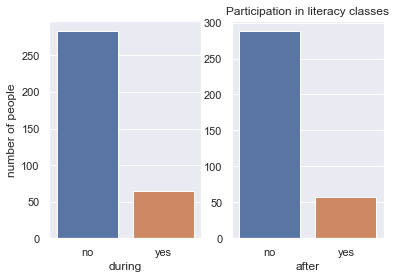

In [33]:
midterm_literacy_classes = herat_mid['a_basics/a_p/literacy_classes'].map({1.0: 'yes', 0.0: 'no'})
endline_literacy_classes = herat_end['A05. Which activities do you participate/d in?/Literacy classes'].map({1: 'yes', 0: 'no'})
fig, ax =plt.subplots(1,2)
sns.countplot(midterm_literacy_classes, ax=ax[0])
sns.countplot(endline_literacy_classes, ax=ax[1])
ax[0].set(xlabel='during', ylabel='number of people')
ax[1].set(xlabel='after', ylabel='')
plt.title('Participation in literacy classes')
fig.show()

As we can see from the above there is no significant difference in ratio of literate men and women during the program and in the end.

##### Tazkera

In [18]:
herat_mid['F07a1. Does the head of HH have tazkera?'].value_counts()

yes    347
no       1
Name: F07a1. Does the head of HH have tazkera?, dtype: int64

In [19]:
herat_end['F07a1. Does the head of HH have tazkera?'].value_counts()

Yes    336
No      10
Name: F07a1. Does the head of HH have tazkera?, dtype: int64

In [20]:
mid_f07 = herat_mid['F07. Does everyone in the household have a tazkera?'].eq('yes').astype(int)
end_f07 = herat_end['F07. Does everyone in the household have a tazkera?'].eq('Yes').astype(int)

stat, p = ttest_ind(end_f07, mid_f07)
print('t=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=8.090, p=0.000
Reject the null hypothesis that the means are equal.


C:\Users\wibot\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


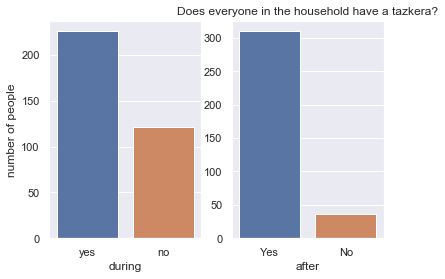

In [35]:
midterm_tazkera = herat_mid['F07. Does everyone in the household have a tazkera?']
endline_tazkera = herat_end['F07. Does everyone in the household have a tazkera?']
fig, ax =plt.subplots(1,2)
sns.countplot(midterm_tazkera, ax=ax[0])
sns.countplot(endline_tazkera, ax=ax[1])
ax[0].set(xlabel='during', ylabel='number of people')
ax[1].set(xlabel='after', ylabel='')
plt.title('Does everyone in the household have a tazkera?')
fig.show()

We can see that endline data has huge improvement in comparisson with midterm data. Everyone has a tazkera for majority of households from endline data.

C:\Users\wibot\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


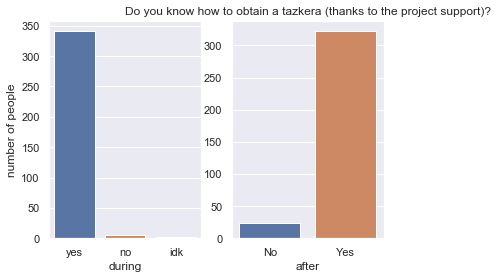

In [34]:
midterm_tazkera = herat_mid['F07b1. do you know how to obtain a tazkera (thanks to the project support)?  y/n/dk']
endline_tazkera = herat_end['F07b1. do you know how to obtain a tazkera (thanks to the project support)?  y/n/dk']
fig, ax =plt.subplots(1,2)
sns.countplot(midterm_tazkera, ax=ax[0])
sns.countplot(endline_tazkera, ax=ax[1])
ax[0].set(xlabel='during', ylabel='number of people')
ax[1].set(xlabel='after', ylabel='')
plt.title('Do you know how to obtain a tazkera (thanks to the project support)?')
fig.show()

Majority of people know how to obtain tazkera due to the program support.

##### What is your average monthly income (entire HH, in AFA)?

In [13]:
stat, p = ttest_ind(herat_end['I03. What is your average monthly income (entire HH, in AFA)?'], herat_mid['I03. What is your average monthly income (entire HH, in AFA)?'], nan_policy='omit')
print('t=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=1.025, p=0.306
Accept null hypothesis that the means are equal.


There is no significant difference in income during the program and in the end.

##### Food consumption

In [16]:
# numerical columns
columns = ['E01. Rice, bread, potatoes, maize',
       'E02. Beans, peas, chickpeas, peanuts, cashew nuts, nut',
       #'E03. All vegetables ',
       'E04. All fruits',
       'E05. Beef, goat, poultry, eggs, fish, sheep',
       'E06. Milk, yoghurt, other dairy products',
       'E07. Sugar, and sugar products, honey', 'E08. Oil, fats and butter',
       'E09. Spices, tea, salt, coffee, small amounts of milk for tea']
for col in columns:
    stat, p = ttest_ind(herat_end[col], herat_mid[col])
    print(col)
    print('t=%.3f, p=%.5f' % (stat, p))
    if p > 0.05:
        print('Accept null hypothesis that the means are equal.')
    else:
        print('Reject the null hypothesis that the means are equal.')

E01. Rice, bread, potatoes, maize
t=-1.158, p=0.24736
Accept null hypothesis that the means are equal.
E02. Beans, peas, chickpeas, peanuts, cashew nuts, nut
t=5.776, p=0.00000
Reject the null hypothesis that the means are equal.
E04. All fruits
t=5.293, p=0.00000
Reject the null hypothesis that the means are equal.
E05. Beef, goat, poultry, eggs, fish, sheep
t=0.875, p=0.38187
Accept null hypothesis that the means are equal.
E06. Milk, yoghurt, other dairy products
t=0.475, p=0.63471
Accept null hypothesis that the means are equal.
E07. Sugar, and sugar products, honey
t=-0.692, p=0.48944
Accept null hypothesis that the means are equal.
E08. Oil, fats and butter
t=-9.084, p=0.00000
Reject the null hypothesis that the means are equal.
E09. Spices, tea, salt, coffee, small amounts of milk for tea
t=-9.601, p=0.00000
Reject the null hypothesis that the means are equal.


There is no significant difference for rice, bread, potatoes, maize, beef, goat, poultry, eggs, fish, sheep, dairy products, sugar consumption per week for endline and midterm data.

Beans, peas, chickpeas, peanuts, cashew nuts, fruits consumption per week got better(more days of the week).

Spices, tea, salt, coffee, small amounts of milk for tea, oil, fats and butter consumption got worse.